In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/evs-one-electric-vehicle-dataset/ElectricCarData_Clean.csv
/kaggle/input/evs-one-electric-vehicle-dataset/ElectricCarData_Norm.csv


In [2]:
import pandas as pd

In [3]:
data=pd.read_csv("/kaggle/input/evs-one-electric-vehicle-dataset/ElectricCarData_Clean.csv")
data

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,Yes,RWD,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,Nissan,Ariya 63kWh,7.5,160,330,191,440,Yes,FWD,Type 2 CCS,Hatchback,C,5,45000
99,Audi,e-tron S Sportback 55 quattro,4.5,210,335,258,540,Yes,AWD,Type 2 CCS,SUV,E,5,96050
100,Nissan,Ariya e-4ORCE 63kWh,5.9,200,325,194,440,Yes,AWD,Type 2 CCS,Hatchback,C,5,50000
101,Nissan,Ariya e-4ORCE 87kWh Performance,5.1,200,375,232,450,Yes,AWD,Type 2 CCS,Hatchback,C,5,65000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            103 non-null    object 
 1   Model            103 non-null    object 
 2   AccelSec         103 non-null    float64
 3   TopSpeed_KmH     103 non-null    int64  
 4   Range_Km         103 non-null    int64  
 5   Efficiency_WhKm  103 non-null    int64  
 6   FastCharge_KmH   103 non-null    object 
 7   RapidCharge      103 non-null    object 
 8   PowerTrain       103 non-null    object 
 9   PlugType         103 non-null    object 
 10  BodyStyle        103 non-null    object 
 11  Segment          103 non-null    object 
 12  Seats            103 non-null    int64  
 13  PriceEuro        103 non-null    int64  
dtypes: float64(1), int64(5), object(8)
memory usage: 11.4+ KB


In [5]:
data.shape

(103, 14)

In [6]:
data.describe

<bound method NDFrame.describe of            Brand                            Model  AccelSec  TopSpeed_KmH  \
0         Tesla     Model 3 Long Range Dual Motor       4.6           233   
1    Volkswagen                         ID.3 Pure      10.0           160   
2      Polestar                                 2       4.7           210   
3           BMW                              iX3        6.8           180   
4         Honda                                e        9.5           145   
..           ...                              ...       ...           ...   
98       Nissan                       Ariya 63kWh       7.5           160   
99         Audi     e-tron S Sportback 55 quattro       4.5           210   
100      Nissan               Ariya e-4ORCE 63kWh       5.9           200   
101      Nissan   Ariya e-4ORCE 87kWh Performance       5.1           200   
102       Byton                 M-Byte 95 kWh 2WD       7.5           190   

     Range_Km  Efficiency_WhKm FastCharge

In [7]:
data.head()

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,Yes,RWD,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997


In [8]:
data.tail()

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
98,Nissan,Ariya 63kWh,7.5,160,330,191,440,Yes,FWD,Type 2 CCS,Hatchback,C,5,45000
99,Audi,e-tron S Sportback 55 quattro,4.5,210,335,258,540,Yes,AWD,Type 2 CCS,SUV,E,5,96050
100,Nissan,Ariya e-4ORCE 63kWh,5.9,200,325,194,440,Yes,AWD,Type 2 CCS,Hatchback,C,5,50000
101,Nissan,Ariya e-4ORCE 87kWh Performance,5.1,200,375,232,450,Yes,AWD,Type 2 CCS,Hatchback,C,5,65000
102,Byton,M-Byte 95 kWh 2WD,7.5,190,400,238,480,Yes,AWD,Type 2 CCS,SUV,E,5,62000


In [9]:
x = data["AccelSec"].values.reshape(-1,1) 
y = data["PriceEuro"].values 

In [10]:
x=data.loc[:,["AccelSec"]]
y=data.loc[:,["PriceEuro"]]

In [11]:
x

,AccelSec
0,4.6
1,10.0
2,4.7
3,6.8
4,9.5
...,...
98,7.5
99,4.5
100,5.9
101,5.1


In [12]:
y

,PriceEuro
0,55480
1,30000
2,56440
3,68040
4,32997
...,...
98,45000
99,96050
100,50000
101,65000


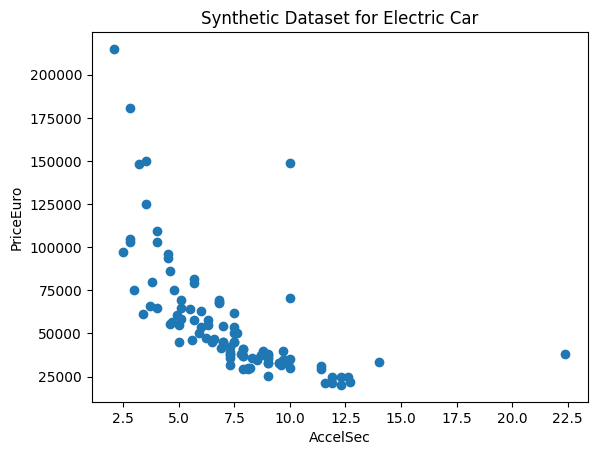

In [13]:
import matplotlib.pyplot as plt
plt.scatter(data['AccelSec'], data['PriceEuro'])
plt.title('Synthetic Dataset for Electric Car')
plt.xlabel('AccelSec')
plt.ylabel('PriceEuro')
plt.show()

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [16]:
from sklearn.ensemble import RandomForestClassifier

In [17]:
from sklearn.tree import DecisionTreeClassifier

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
from sklearn.metrics import accuracy_score

In [20]:
models = {
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
}

In [21]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x, y)

LinearRegression()

In [22]:
lr=LinearRegression()
lr

LinearRegression()

In [23]:
lr.fit(x_train,y_train)

LinearRegression()

In [24]:
y_predict=lr.predict(x_test)

In [25]:
y_test

,PriceEuro
26,33000
60,29234
2,56440
51,215000
71,45000
76,57500
16,180781
66,33246
56,37422
48,149000


In [26]:
y_predict

array([[42989.25815521],
       [27299.83832303],
       [71099.46868785],
       [88096.3401727 ],
       [56063.77468202],
       [60639.8554664 ],
       [83520.25938832],
       [10302.96683818],
       [44950.43563423],
       [36451.9998918 ],
       [71753.19451419],
       [54102.597203  ],
       [52795.14555032],
       [75675.54947223],
       [48872.79059227],
       [57371.2263347 ],
       [36451.9998918 ],
       [79597.90443028],
       [82212.80773564],
       [65215.93625079],
       [21416.30588597]])

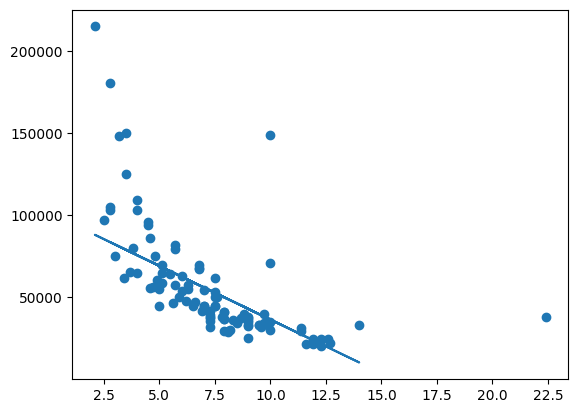

In [27]:
plt.scatter(x,y)
plt.plot(x_test,y_predict)

In [28]:
model.fit(x_train, y_train)
model.intercept_

array([101824.58252586])

In [29]:
model.coef_

array([[-6537.25826341]])

In [30]:
import numpy as np
x_new = np.array([15, 35, 55]).reshape(-1, 1)
y_pred = model.predict(x_new)

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


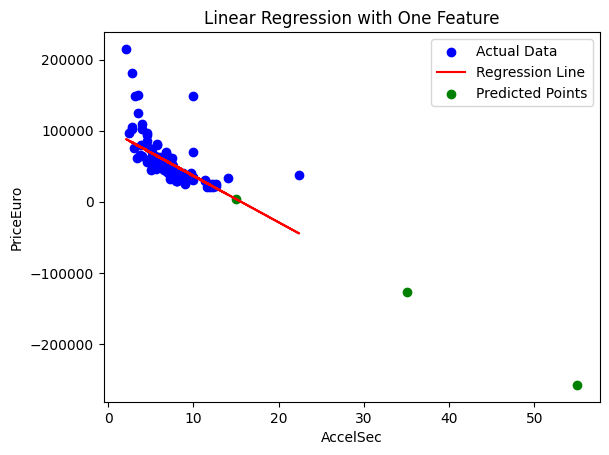

In [31]:
plt.scatter(x, y, color='blue', label='Actual Data')
plt.plot(x, model.predict(x), color='red', label='Regression Line')  
plt.scatter(x_new, y_pred, color='green', label='Predicted Points')  
plt.xlabel('AccelSec')
plt.ylabel('PriceEuro')
plt.title('Linear Regression with One Feature')
plt.legend()
plt.show()

In [32]:
from sklearn.metrics import mean_absolute_error, mean_squared_error ,r2_score
mae = mean_absolute_error(y_test , y_predict)
mse = mean_squared_error(y_test , y_predict)
r2 = r2_score(y_test , y_predict)
print(f"Mean Absolute Error= {mae}")
print(f"Mean Squared Error= {mse}")
print(f"R Squared (R2)= {r2}")

Mean Absolute Error= 25577.113923958503
Mean Squared Error= 1961933865.2764366
R Squared (R2)= 0.22891866215944068


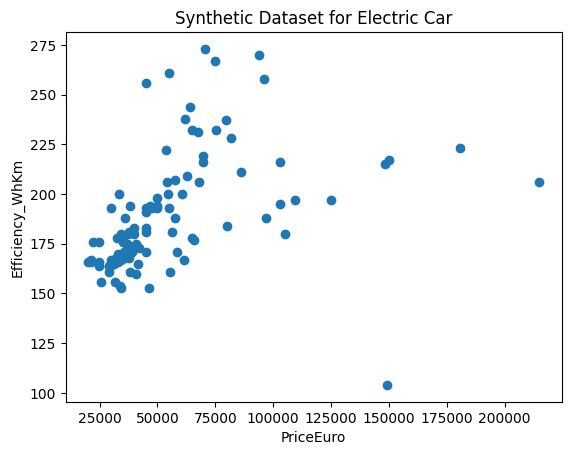

In [33]:
import matplotlib.pyplot as plt
plt.scatter(data['PriceEuro'], data['Efficiency_WhKm'])
plt.title('Synthetic Dataset for Electric Car')
plt.xlabel('PriceEuro')
plt.ylabel('Efficiency_WhKm')
plt.show()